# Glass Classification Analysis

## by Justin Sierchio

In this analysis, we will be looking at different glass types. We hope to answer some of the following questions:

<ul>
    <li>What kind of variations exist in this glass catalog?</li>
    <li>Can we predict glass type based upon certain features?</li>
    <li>Are there any other observations we can make from this dataset</li>

This data is in .csv file format and is from Kaggle at: https://www.kaggle.com/uciml/glass/download. More information related to the dataset can be found at: https://www.kaggle.com/uciml/glass.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
df_GLASS = pd.read_csv("glass.csv");

print('Datasets uploaded!');

Datasets uploaded!


In [3]:
# Display 1st 5 rows from Glass dataset
df_GLASS.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Data Cleaning

Let's make sure that the data has no 'NaN' or 'null' values.

In [4]:
# Check for 'NaN' or 'null' values
df_GLASS.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

As we can see, there are no 'NaN' or 'null' values, so it appears that we are working with a clean data set.

## Exploratory Data Analysis

To begin, let's first explain what each of the columns means.

<ul>
    <li>0, 1, 2, ... : catalog ID</li>
    <li>RI: refractive index</li>
    <li>Na: Sodium content (weight % in oxide form)</li>
    <li>Mg: Magnesium content (weight % in oxide form)</li>
    <li>Al: Aluminum content (weight % in oxide form)</li>
    <li>Si: Silicon content (weight % in oxide form)</li>
    <li>K: Potassium content (weight % in oxide form)</li>
    <li>Ca: Calcium content (weight % in oxide form)</li>
    <li>Ba: Barium content (weight % in oxide form)</li>
    <li>Fe: Iron content (weight % in oxide form)</li>
    <li>Type: Glass attribute (1 = buildingwindowsfloatprocessed; 2 = buildingwindowsnonfloatprocessed, 3 = vehiclewindowsfloatprocessed; 4 = vehiclewindowsnonfloatprocessed; 5 = containers; 6 = tableware; 7 = headlamps)</li>

Let's get a sense of the ranges of refractive indices in this dataset.

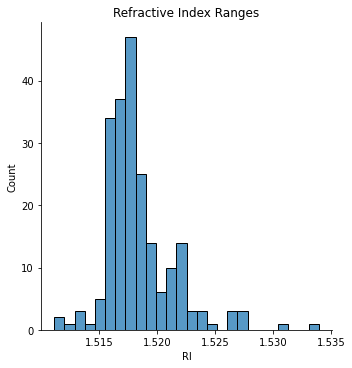

In [5]:
# Plot the range of refractive indices
ax = sns.displot(df_GLASS.RI).set(title='Refractive Index Ranges')

So we can see the ranges of the refractive indicies are predominately between 1.515 and 1.525. Similarly, let us look at the ranges for the element percentages (or doping %) for each of the elements in the glass dataset.

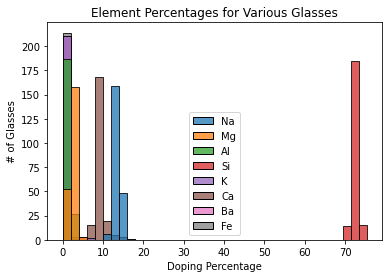

In [6]:
# Create a second dataset from the first
df_GLASS2 = df_GLASS.copy()
df_GLASS2.drop(columns=['RI', 'Type'], inplace = True)

# Plot the doping %s for each element in the glass dataset
ax_DOPED = sns.histplot(df_GLASS2).set(title = 'Element Percentages for Various Glasses', xlabel = 'Doping Percentage',
                                     ylabel = '# of Glasses')

As we can see from the plot above, most of the doping is in the range of 0% to 15%, with Sodium (Na), Potassium (K) and Magnesium (Mg) most prevalent. Most glass is made from Silicon (Si) so we can see that around 75% of the glass composition is indeed the same element.

Now let's take a look at the glass type.

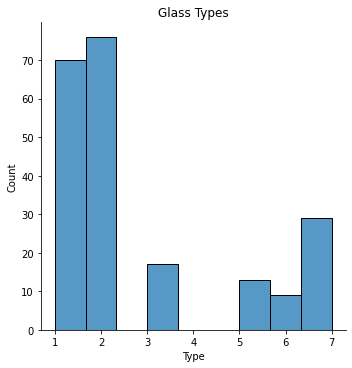

In [7]:
# Plot the range glass types
ax_TYPE = sns.displot(df_GLASS.Type).set(title='Glass Types')

As we can see from the glass type plot, the majority of the glasses fall into categories 1 and 2, which correspond to "building windows" (either float or non-float processed, respectively).

Interestingly, many of the glasses (about 30) are only used in headlamps, while even less are used in vehicles, containers and tableware. This observation is not surprising considering the fact that glass is most commonly found in building windows where it can be more easily processed on a lower cost-per-area basis.

## Machine Learning Algorithm

Now let's build a machine learning algorithm to be able to predict different glass types. First, we need to import a few more needed libraries and functions, as well as create the X and Y components for training sets.

In [8]:
# Import Needed Functions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Import scoring metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_score, f1_score, precision_score, recall_score

# Import classification algorithms
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

print('Needed functions loaded into workspace!')

Needed functions loaded into workspace!


Now let's divide the dataset into independent (x) and dependent (y) variables.

In [9]:
# Create the independent (x) and dependent (y) variables for the ML algorithm
X = df_GLASS.drop(['Type'],axis=1)
Y = df_GLASS.Type

In order for the machine algorithms to work, we need to apply a standard scaler to the dataset.

In [10]:
# Apply a Scalar to the dataset
SS = StandardScaler()
X_SS = SS.fit_transform(X)

Now because we removed the 'Type' column from X, we need to reformat the modified X set.

In [11]:
# Reset the columns for the dependent variable
Y = Y-1

# Turn the dependent variable into a set
set(Y)

# Remove the extra blank columns
Y = Y.replace(4,3)
Y = Y.replace(5,4)
Y = Y.replace(6,5)

Now we can create our test-train split (with 20% serving as the test size).

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_SS, Y, test_size=0.2, random_state = 10)

Finally, we want to be able to record the results of the different classification algorithms so we can compare them against one another. To accomplish this task, we create a blank variable called 'Comparison'.

In [13]:
# Create holding variable for different classification comparisons
Comparison = []

### K-Nearest Neighbor

In [14]:
# Construct the KNN Algorithm
neighbor = np.arange(1,7)
train_accuracy =np.empty(len(neighbor))
test_accuracy = np.empty(len(neighbor))

for i,k in enumerate(neighbor):
    KNN = knn(n_neighbors=k)
    KNN.fit(X_train,y_train)
    train_accuracy[i] = KNN.score(X_train, y_train)
    test_accuracy[i] = KNN.score(X_test, y_test)

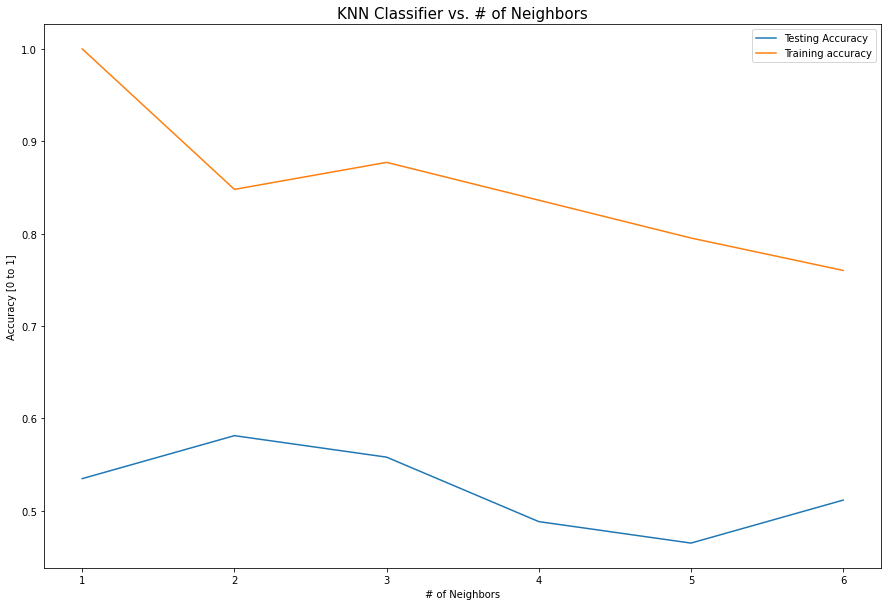

In [15]:
# Plot the KNN Algorithm to determine the needed # of neighbors
plt.figure(figsize=(15,10))
plt.title('KNN Classifier vs. # of Neighbors', fontsize=15)
plt.plot(neighbor, test_accuracy, label='Testing Accuracy')
plt.plot(neighbor, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('# of Neighbors')
plt.ylabel('Accuracy [0 to 1]')
plt.show()

In [16]:
# Enter # of neighbors for highest accuracy level into KNN Algorithm
KNN = knn(n_neighbors=2)
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [17]:
# Determine KNN Accuracy
KNN_accuracy=KNN.score(X_test,y_test)
Comparison.append(KNN_accuracy)

### Decision Trees

In [18]:
# Using Decision Trees Algorithm
dTree = DecisionTreeClassifier()
dTree.fit(X_train, y_train)
dTree_prediction = dTree.predict(X_test)
dTree_accuracy = accuracy_score(dTree_prediction , y_test)
Comparison.append(dTree_accuracy)

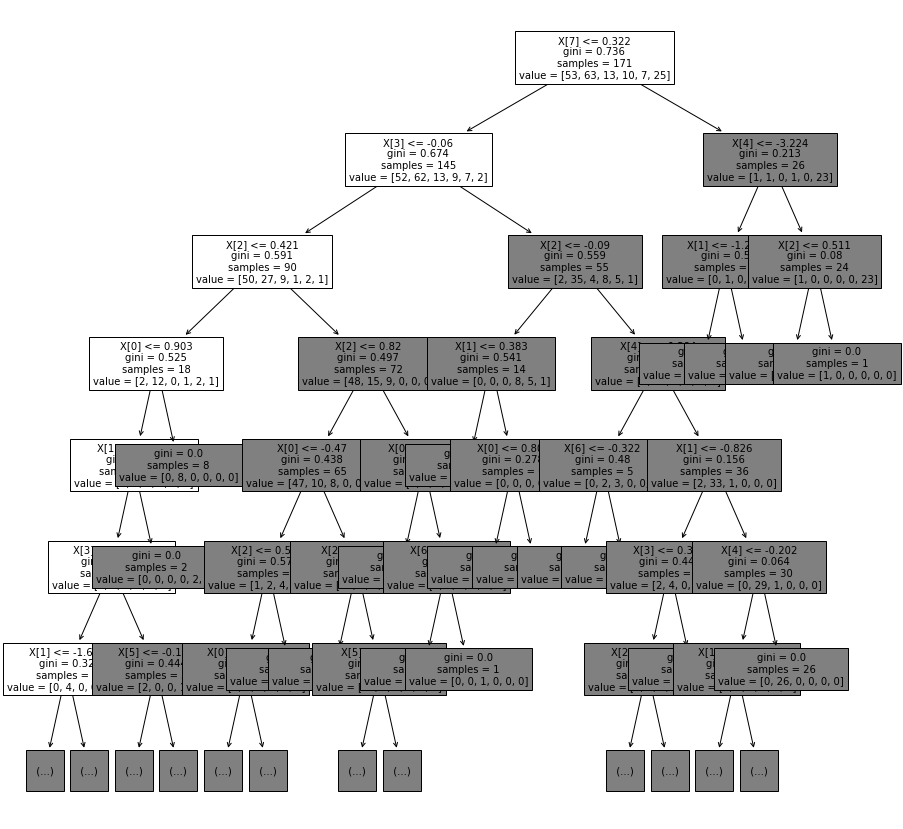

In [19]:
# Plotting Decision Tree Algorithm
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(dTree, max_depth=6, fontsize=10)
plt.show()

### Logistic Regression

In [20]:
# Using Logistic Regression Algorithm
LR = LogisticRegression(solver='liblinear', multi_class='ovr')
LR.fit(X_train, y_train)
LR_prediction = LR.predict(X_test)
LR_accuracy = accuracy_score(LR_prediction , y_test)
Comparison.append(LR_accuracy)

### Support Vector Machine

In [21]:
# Using Decision Trees Algorithm
SVMmodel = SVC()
SVMmodel.fit(X_train, y_train)
SVM_prediction = SVMmodel.predict(X_test)
SVM_accuracy = accuracy_score(SVM_prediction , y_test)
Comparison.append(SVM_accuracy)

Now that we have all the algorithms, let display the results.

### Machine Learning Algorithm Results

In [22]:
# Display Accuracy Data for all 4 classification algorithms
# Construct DataFrame
ClassificationAccuracies = pd.DataFrame(data=None,columns=['Accuracy'], index=['K-Nearest Neighbor', 'Decision Trees',
                                                                              'Logistic Regression', 'Support Vector Machine'])
ClassificationAccuracies['Accuracy'][0] = Comparison[0]
ClassificationAccuracies['Accuracy'][1] = Comparison[1]
ClassificationAccuracies['Accuracy'][2] = Comparison[2]
ClassificationAccuracies['Accuracy'][3] = Comparison[3]

# Display Results
ClassificationAccuracies

,Accuracy
K-Nearest Neighbor,0.581395
Decision Trees,0.674419
Logistic Regression,0.55814
Support Vector Machine,0.581395


As we see from the above table, Decision Trees is the most accurate classification algorithm for our glass type model.

## Discussion

In this open-ended project, we were able to show the following:

<ul>
    <li>(1) The vast majority of glasses have refractive indicies of 1.515 and 1.525.</li>
    <li>(2) Sodium, Magnesium and Iron are the most common dopants.</li>
    <li>(3) The majority of glasses are used in windows.</li>
    <li>(4) Based upon this dataset, we can predict the glass use type in about 3/5 cases.</li>
</ul>

## Conclusion

The goal of this project was to explore glass types. In this project, we were able to upload a real-world dataset, clean the data systematically, perform several different exploratory data analysis, make useful data visualizations, and draw logical inferences from those analyses. It is the author's hope that others find this exericse useful. Thanks for reading!